<a href="https://colab.research.google.com/github/Nanoth-T/Learning-Machine-Learning/blob/main/forecasting_darts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.8/784.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [ ]:
fact_pop = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS32CwyqxuFUhQ8CBfd3zgO3gZKPVquxVuE-Vc6Rv0dIg1We-Ph0p4IkTuI-z53FX7klUuWjnGiE-c8/pub?output=csv');
# fact_age = pd.read_csv('/content/drive/MyDrive/Worapoj/Data Mining/Pop/Fact Age.csv');
# age_dim = pd.read_csv('/content/drive/MyDrive/Worapoj/Data Mining/Pop/Age.csv');
region_dim = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSQAMKtayPw9RN6t9LJTeQa0oMKm3jXLiWXJKXh_PWTG8idsNI7R9ZFvV4ec7TCw7f8wRux9roztVNF/pub?output=csv');
time_dim = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRuZGDG_7OhAKFpZyQ1ev-iIixY73-1o1PvGedh7_yVZVFAjUtd9KQyoDjY4eBlCEI5jw3UC_7us4WD/pub?output=csv');

In [ ]:
Pop = fact_pop.merge(time_dim, on=["time_key"], how="left")
pop = Pop.merge(region_dim, on=["region_key"], how="left")
#Pop2 = Pop1.merge(fact_age, on=["time_key"], how="left")
#Pop3 = Pop2.merge(age_dim, on=["age_key"], how="left")

In [ ]:
pop

,demography_key,time_key,region_key,population,pop_male,pop_female,area,density,sum_house,increase_rate,year,province,region
0,1,11,1,5494932,2571974,2922958,1568.737061,3502.774414,3197865,-0.599879,2565,กรุงเทพมหานคร,ภาคกลาง
1,2,2,1,5686252,2694921,2991331,1568.737061,3624.732422,2593827,0.220000,2556,กรุงเทพมหานคร,ภาคกลาง
2,3,7,1,5676648,2679453,2997195,1568.737061,3618.610352,2959524,-0.100000,2561,กรุงเทพมหานคร,ภาคกลาง
3,4,10,1,5527994,2592292,2935702,1568.737061,3523.850098,3147231,-1.080000,2564,กรุงเทพมหานคร,ภาคกลาง
4,5,3,1,5692284,2695519,2996765,1568.737061,3628.577637,2672423,0.110000,2557,กรุงเทพมหานคร,ภาคกลาง
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,843,2,76,329536,162018,167518,6730.246094,48.963440,113246,0.180000,2556,อุทัยธานี,ภาคเหนือ
843,844,1,76,328950,161735,167215,6730.246094,48.876369,110882,0.280000,2555,อุทัยธานี,ภาคเหนือ
844,845,9,76,325868,159322,166546,6730.246094,48.418438,125666,-0.840000,2563,อุทัยธานี,ภาคเหนือ
845,846,8,76,328618,160855,167763,6730.246094,48.827042,123952,-0.250000,2562,อุทัยธานี,ภาคเหนือ


In [ ]:
pop.drop(["demography_key", "time_key", "region_key"], axis=1, inplace=True)
pop

,population,pop_male,pop_female,area,density,sum_house,increase_rate,year,province,region
0,5494932,2571974,2922958,1568.737061,3502.774414,3197865,-0.599879,2565,กรุงเทพมหานคร,ภาคกลาง
1,5686252,2694921,2991331,1568.737061,3624.732422,2593827,0.220000,2556,กรุงเทพมหานคร,ภาคกลาง
2,5676648,2679453,2997195,1568.737061,3618.610352,2959524,-0.100000,2561,กรุงเทพมหานคร,ภาคกลาง
3,5527994,2592292,2935702,1568.737061,3523.850098,3147231,-1.080000,2564,กรุงเทพมหานคร,ภาคกลาง
4,5692284,2695519,2996765,1568.737061,3628.577637,2672423,0.110000,2557,กรุงเทพมหานคร,ภาคกลาง
...,...,...,...,...,...,...,...,...,...,...
842,329536,162018,167518,6730.246094,48.963440,113246,0.180000,2556,อุทัยธานี,ภาคเหนือ
843,328950,161735,167215,6730.246094,48.876369,110882,0.280000,2555,อุทัยธานี,ภาคเหนือ
844,325868,159322,166546,6730.246094,48.418438,125666,-0.840000,2563,อุทัยธานี,ภาคเหนือ
845,328618,160855,167763,6730.246094,48.827042,123952,-0.250000,2562,อุทัยธานี,ภาคเหนือ


# factpop

In [ ]:
pop

,population,pop_male,pop_female,area,density,sum_house,increase_rate,year,province,region
0,5494932,2571974,2922958,1568.737061,3502.774414,3197865,-0.599879,2565,กรุงเทพมหานคร,ภาคกลาง
1,5686252,2694921,2991331,1568.737061,3624.732422,2593827,0.220000,2556,กรุงเทพมหานคร,ภาคกลาง
2,5676648,2679453,2997195,1568.737061,3618.610352,2959524,-0.100000,2561,กรุงเทพมหานคร,ภาคกลาง
3,5527994,2592292,2935702,1568.737061,3523.850098,3147231,-1.080000,2564,กรุงเทพมหานคร,ภาคกลาง
4,5692284,2695519,2996765,1568.737061,3628.577637,2672423,0.110000,2557,กรุงเทพมหานคร,ภาคกลาง
...,...,...,...,...,...,...,...,...,...,...
842,329536,162018,167518,6730.246094,48.963440,113246,0.180000,2556,อุทัยธานี,ภาคเหนือ
843,328950,161735,167215,6730.246094,48.876369,110882,0.280000,2555,อุทัยธานี,ภาคเหนือ
844,325868,159322,166546,6730.246094,48.418438,125666,-0.840000,2563,อุทัยธานี,ภาคเหนือ
845,328618,160855,167763,6730.246094,48.827042,123952,-0.250000,2562,อุทัยธานี,ภาคเหนือ


## BKK

In [ ]:
popbkk = pop.loc[pop["province"] == "กรุงเทพมหานคร"]
popbkk

,population,pop_male,pop_female,area,density,sum_house,increase_rate,year,province,region
0,5494932,2571974,2922958,1568.737061,3502.774414,3197865,-0.599879,2565,กรุงเทพมหานคร,ภาคกลาง
1,5686252,2694921,2991331,1568.737061,3624.732422,2593827,0.220000,2556,กรุงเทพมหานคร,ภาคกลาง
2,5676648,2679453,2997195,1568.737061,3618.610352,2959524,-0.100000,2561,กรุงเทพมหานคร,ภาคกลาง
3,5527994,2592292,2935702,1568.737061,3523.850098,3147231,-1.080000,2564,กรุงเทพมหานคร,ภาคกลาง
4,5692284,2695519,2996765,1568.737061,3628.577637,2672423,0.110000,2557,กรุงเทพมหานคร,ภาคกลาง
5,5682415,2682962,2999453,1568.737061,3622.286621,2887274,-0.070000,2560,กรุงเทพมหานคร,ภาคกลาง
6,5673560,2690754,2982806,1568.737061,3616.641846,2522855,-0.020000,2555,กรุงเทพมหานคร,ภาคกลาง
7,5686646,2687253,2999393,1568.737061,3624.983643,2816711,-0.170000,2559,กรุงเทพมหานคร,ภาคกลาง
8,5666264,2669316,2996948,1568.737061,3611.990967,3041115,-0.180000,2562,กรุงเทพมหานคร,ภาคกลาง
9,5588222,2625938,2962284,1568.737061,3562.242676,3103483,-1.390000,2563,กรุงเทพมหานคร,ภาคกลาง


In [ ]:
popbkk["year"] = popbkk["year"]  - 543
popbkk

<ipython-input-10-7dbe74006f43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popbkk["year"] = popbkk["year"]  - 543


,population,pop_male,pop_female,area,density,sum_house,increase_rate,year,province,region
0,5494932,2571974,2922958,1568.737061,3502.774414,3197865,-0.599879,2022,กรุงเทพมหานคร,ภาคกลาง
1,5686252,2694921,2991331,1568.737061,3624.732422,2593827,0.220000,2013,กรุงเทพมหานคร,ภาคกลาง
2,5676648,2679453,2997195,1568.737061,3618.610352,2959524,-0.100000,2018,กรุงเทพมหานคร,ภาคกลาง
3,5527994,2592292,2935702,1568.737061,3523.850098,3147231,-1.080000,2021,กรุงเทพมหานคร,ภาคกลาง
4,5692284,2695519,2996765,1568.737061,3628.577637,2672423,0.110000,2014,กรุงเทพมหานคร,ภาคกลาง
5,5682415,2682962,2999453,1568.737061,3622.286621,2887274,-0.070000,2017,กรุงเทพมหานคร,ภาคกลาง
6,5673560,2690754,2982806,1568.737061,3616.641846,2522855,-0.020000,2012,กรุงเทพมหานคร,ภาคกลาง
7,5686646,2687253,2999393,1568.737061,3624.983643,2816711,-0.170000,2016,กรุงเทพมหานคร,ภาคกลาง
8,5666264,2669316,2996948,1568.737061,3611.990967,3041115,-0.180000,2019,กรุงเทพมหานคร,ภาคกลาง
9,5588222,2625938,2962284,1568.737061,3562.242676,3103483,-1.390000,2020,กรุงเทพมหานคร,ภาคกลาง


In [ ]:
popbkk["year"] = pd.to_datetime(popbkk['year'].astype(str), format='%Y')
popbkk

<ipython-input-11-0cd4b694a835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popbkk["year"] = pd.to_datetime(popbkk['year'].astype(str), format='%Y')


,population,pop_male,pop_female,area,density,sum_house,increase_rate,year,province,region
0,5494932,2571974,2922958,1568.737061,3502.774414,3197865,-0.599879,2022-01-01,กรุงเทพมหานคร,ภาคกลาง
1,5686252,2694921,2991331,1568.737061,3624.732422,2593827,0.220000,2013-01-01,กรุงเทพมหานคร,ภาคกลาง
2,5676648,2679453,2997195,1568.737061,3618.610352,2959524,-0.100000,2018-01-01,กรุงเทพมหานคร,ภาคกลาง
3,5527994,2592292,2935702,1568.737061,3523.850098,3147231,-1.080000,2021-01-01,กรุงเทพมหานคร,ภาคกลาง
4,5692284,2695519,2996765,1568.737061,3628.577637,2672423,0.110000,2014-01-01,กรุงเทพมหานคร,ภาคกลาง
5,5682415,2682962,2999453,1568.737061,3622.286621,2887274,-0.070000,2017-01-01,กรุงเทพมหานคร,ภาคกลาง
6,5673560,2690754,2982806,1568.737061,3616.641846,2522855,-0.020000,2012-01-01,กรุงเทพมหานคร,ภาคกลาง
7,5686646,2687253,2999393,1568.737061,3624.983643,2816711,-0.170000,2016-01-01,กรุงเทพมหานคร,ภาคกลาง
8,5666264,2669316,2996948,1568.737061,3611.990967,3041115,-0.180000,2019-01-01,กรุงเทพมหานคร,ภาคกลาง
9,5588222,2625938,2962284,1568.737061,3562.242676,3103483,-1.390000,2020-01-01,กรุงเทพมหานคร,ภาคกลาง


In [ ]:
popbkk.set_index(["year"], inplace=True)
popbkk

,population,pop_male,pop_female,area,density,sum_house,increase_rate,province,region
year,,,,,,,,,
2022-01-01,5494932,2571974,2922958,1568.737061,3502.774414,3197865,-0.599879,กรุงเทพมหานคร,ภาคกลาง
2013-01-01,5686252,2694921,2991331,1568.737061,3624.732422,2593827,0.220000,กรุงเทพมหานคร,ภาคกลาง
2018-01-01,5676648,2679453,2997195,1568.737061,3618.610352,2959524,-0.100000,กรุงเทพมหานคร,ภาคกลาง
2021-01-01,5527994,2592292,2935702,1568.737061,3523.850098,3147231,-1.080000,กรุงเทพมหานคร,ภาคกลาง
2014-01-01,5692284,2695519,2996765,1568.737061,3628.577637,2672423,0.110000,กรุงเทพมหานคร,ภาคกลาง
2017-01-01,5682415,2682962,2999453,1568.737061,3622.286621,2887274,-0.070000,กรุงเทพมหานคร,ภาคกลาง
2012-01-01,5673560,2690754,2982806,1568.737061,3616.641846,2522855,-0.020000,กรุงเทพมหานคร,ภาคกลาง
2016-01-01,5686646,2687253,2999393,1568.737061,3624.983643,2816711,-0.170000,กรุงเทพมหานคร,ภาคกลาง
2019-01-01,5666264,2669316,2996948,1568.737061,3611.990967,3041115,-0.180000,กรุงเทพมหานคร,ภาคกลาง


### all pop

In [ ]:
allpopbkk = popbkk[["population"]]
allpopbkk

,population
year,
2022-01-01,5494932
2013-01-01,5686252
2018-01-01,5676648
2021-01-01,5527994
2014-01-01,5692284
2017-01-01,5682415
2012-01-01,5673560
2016-01-01,5686646
2019-01-01,5666264


In [ ]:
import darts
from darts import TimeSeries
from darts.datasets import AirPassengersDataset
from darts.metrics import mape, mse, mae

In [ ]:
allpopbkk = darts.TimeSeries.from_dataframe(allpopbkk)
allpopbkk

<TimeSeries (DataArray) (year: 11, component: 1, sample: 1)>
array([[[5673560.]],

       [[5686252.]],

       [[5692284.]],

       [[5696409.]],

       [[5686646.]],

       [[5682415.]],

       [[5676648.]],

       [[5666264.]],

       [[5588222.]],

       [[5527994.]],

       [[5494932.]]])
Coordinates:
  * year       (year) datetime64[ns] 2012-01-01 2013-01-01 ... 2022-01-01
  * component  (component) object 'population'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='year'>

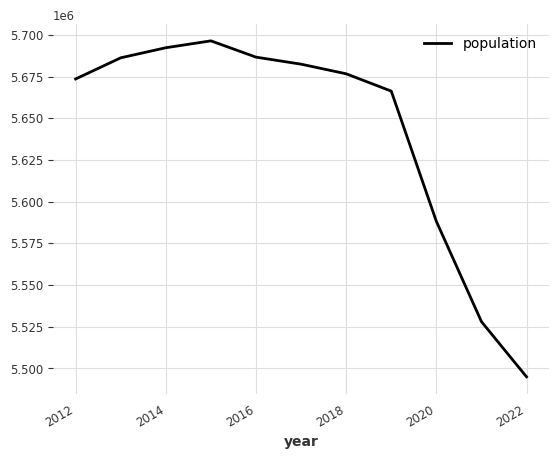

In [ ]:
allpopbkk.plot()

#### NaiveDrift

MAPE: 0.43%
MSE: 1153973220.76
MAE: 24000.50


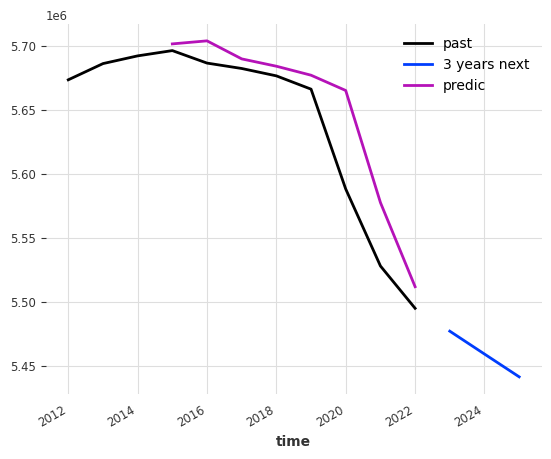

In [ ]:
# from darts.datasets import AirPassengersDataset
from darts.models import NaiveDrift

# testmodel = NaiveDrift()
# testmodel.fit(allpopbkk[:-2])
# testpred = testmodel.predict(2)

model = NaiveDrift()
model.fit(allpopbkk)
history = model.historical_forecasts(allpopbkk)
pred = model.predict(3)

allpopbkk.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(allpopbkk, history)))
print("MSE: {:.2f}".format(mse(allpopbkk, history)))
print("MAE: {:.2f}".format(mae(allpopbkk, history)))
# testpred.plot(label="testpred")

In [ ]:
pred.pd_dataframe().astype(int)

component,population
year,
2023-01-01,5477069
2024-01-01,5459206
2025-01-01,5441343


#### LinearRegressionModel

MAPE: 1.95%
MSE: 26868333578.45
MAE: 107898.21


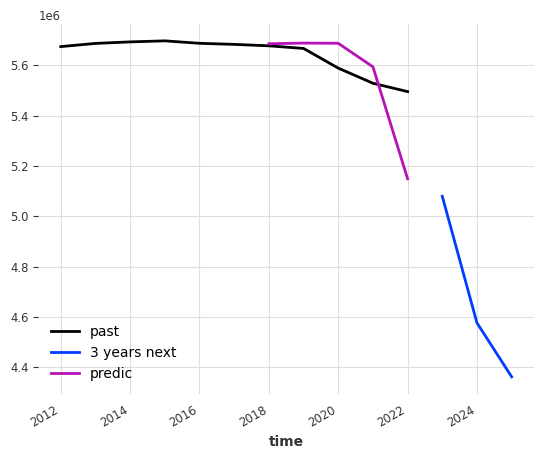

In [ ]:
from darts.models import LinearRegressionModel

# testmodel = LinearRegressionModel(lags=3)
# testmodel.fit(allpopbkk[:-2])
# testpred = testmodel.predict(2)

model = LinearRegressionModel(lags=3, output_chunk_length=2)
model.fit(allpopbkk)
history = model.historical_forecasts(allpopbkk)
pred = model.predict(3)

allpopbkk.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(allpopbkk, history)))
print("MSE: {:.2f}".format(mse(allpopbkk, history)))
print("MAE: {:.2f}".format(mae(allpopbkk, history)))
# testpred.plot(label="testpred")


In [ ]:
pred.pd_dataframe().astype(int)

component,population
year,
2023-01-01,5079304
2024-01-01,4576933
2025-01-01,4362401


#### TBATS

MAPE: 0.87%
MSE: 4239990975.97
MAE: 48623.08


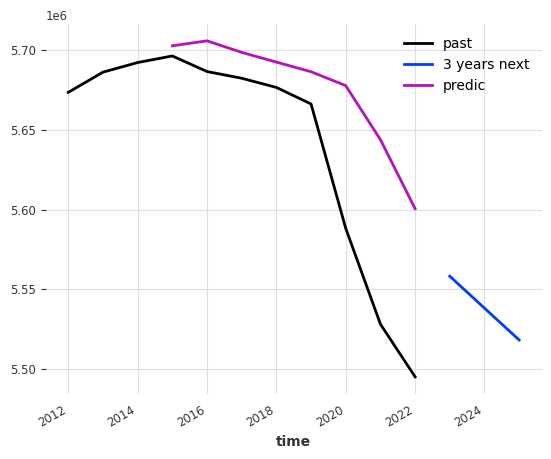

In [ ]:
from darts.models import TBATS

# testmodel = TBATS(use_trend=True)
# testmodel.fit(allpopbkk[:-3])
# testpred = testmodel.predict(2)

model = TBATS(use_trend=True)
model.fit(allpopbkk)
history = model.historical_forecasts(allpopbkk)
pred = model.predict(3)

allpopbkk.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(allpopbkk, history)))
print("MSE: {:.2f}".format(mse(allpopbkk, history)))
print("MAE: {:.2f}".format(mae(allpopbkk, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,population
year,
2023-01-01,5558125
2024-01-01,5538098
2025-01-01,5518071


#### FourTheta

MAPE: 0.44%
MSE: 1284023403.67
MAE: 24694.34


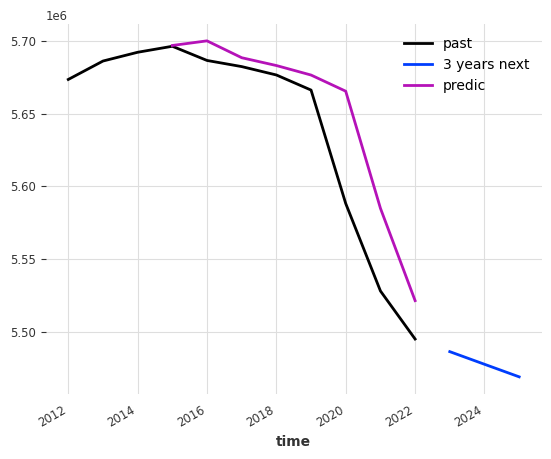

In [ ]:
from darts.models import FourTheta

# testmodel = FourTheta(theta=2)
# testmodel.fit(allpopbkk[:-3])
# testpred = testmodel.predict(2)

model = FourTheta(theta=2)
model.fit(allpopbkk)
history = model.historical_forecasts(allpopbkk)
pred = model.predict(3)

allpopbkk.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(allpopbkk, history)))
print("MSE: {:.2f}".format(mse(allpopbkk, history)))
print("MAE: {:.2f}".format(mae(allpopbkk, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,population
year,
2023-01-01,5486256
2024-01-01,5477580
2025-01-01,5468905


### **sex pop**




In [ ]:
sexpopbkk = popbkk[["pop_male", "pop_female"]]
sexpopbkk

,pop_male,pop_female
year,,
2022-01-01,2571974,2922958
2013-01-01,2694921,2991331
2018-01-01,2679453,2997195
2021-01-01,2592292,2935702
2014-01-01,2695519,2996765
2017-01-01,2682962,2999453
2012-01-01,2690754,2982806
2016-01-01,2687253,2999393
2019-01-01,2669316,2996948


In [ ]:
sexpopbkk = TimeSeries.from_dataframe(sexpopbkk)
sexpopbkk

<TimeSeries (DataArray) (year: 11, component: 2, sample: 1)>
array([[[2690754.],
        [2982806.]],

       [[2694921.],
        [2991331.]],

       [[2695519.],
        [2996765.]],

       [[2695051.],
        [3001358.]],

       [[2687253.],
        [2999393.]],

       [[2682962.],
        [2999453.]],

       [[2679453.],
        [2997195.]],

       [[2669316.],
        [2996948.]],

       [[2625938.],
        [2962284.]],

       [[2592292.],
        [2935702.]],

       [[2571974.],
        [2922958.]]])
Coordinates:
  * year       (year) datetime64[ns] 2012-01-01 2013-01-01 ... 2022-01-01
  * component  (component) object 'pop_male' 'pop_female'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='year'>

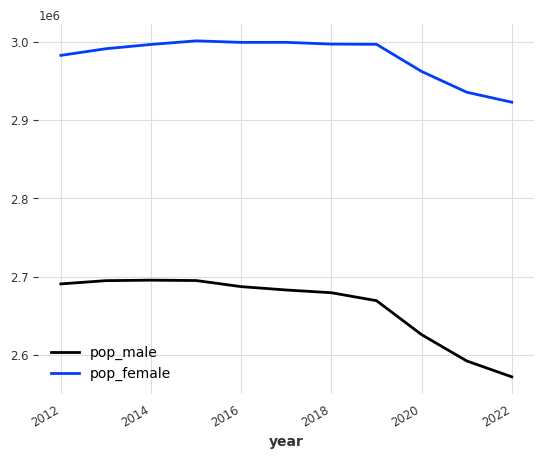

In [ ]:
sexpopbkk.plot()

#### NaiveDrift

MAPE: 0.43%
MSE: 290540804.90
MAE: 12000.25


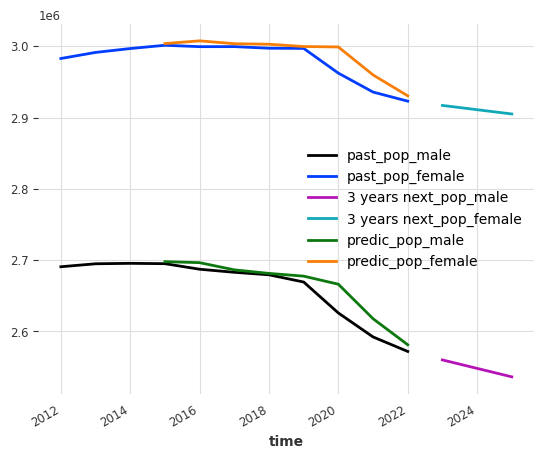

In [ ]:
model = NaiveDrift()
model.fit(sexpopbkk)
history = model.historical_forecasts(sexpopbkk)
pred = model.predict(3)

sexpopbkk.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopbkk, history)))
print("MSE: {:.2f}".format(mse(sexpopbkk, history)))
print("MAE: {:.2f}".format(mae(sexpopbkk, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_male,pop_female
year,,
2023-01-01,2560096,2916973
2024-01-01,2548218,2910988
2025-01-01,2536340,2905003


#### LinearRegression

MAPE: 1.87%
MSE: 4741790608.62
MAE: 50715.96


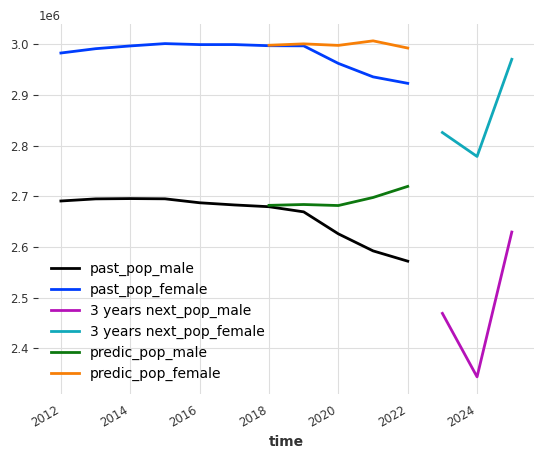

In [ ]:
from darts.models import LinearRegressionModel

# testmodel = LinearRegressionModel(lags=3, output_chunk_length=2)
# testmodel.fit(sexpopbkk[:-2])
# testpred = testmodel.predict(2)

model = LinearRegressionModel(lags=3, output_chunk_length=2)
model.fit(sexpopbkk)
history = model.historical_forecasts(sexpopbkk)
pred = model.predict(3)

sexpopbkk.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopbkk, history)))
print("MSE: {:.2f}".format(mse(sexpopbkk, history)))
print("MAE: {:.2f}".format(mae(sexpopbkk, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_male,pop_female
year,,
2023-01-01,2468974,2825868
2024-01-01,2343700,2778653
2025-01-01,2629481,2970381


#### TBATS

MAPE: 0.98%
MSE: 1185211254.38
MAE: 25515.52


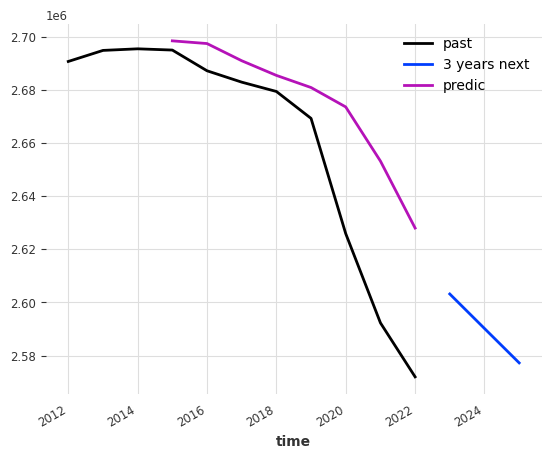

In [ ]:
from darts.models import TBATS

model = TBATS(use_trend=True)
model.fit(sexpopbkk["pop_male"])
history = model.historical_forecasts(sexpopbkk["pop_male"])
pred = model.predict(3)

sexpopbkk["pop_male"].plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopbkk["pop_male"], history)))
print("MSE: {:.2f}".format(mse(sexpopbkk["pop_male"], history)))
print("MAE: {:.2f}".format(mae(sexpopbkk["pop_male"], history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_male
year,
2023-01-01,2603183
2024-01-01,2590209
2025-01-01,2577236


MAPE: 0.71%
MSE: 775568808.49
MAE: 21078.74


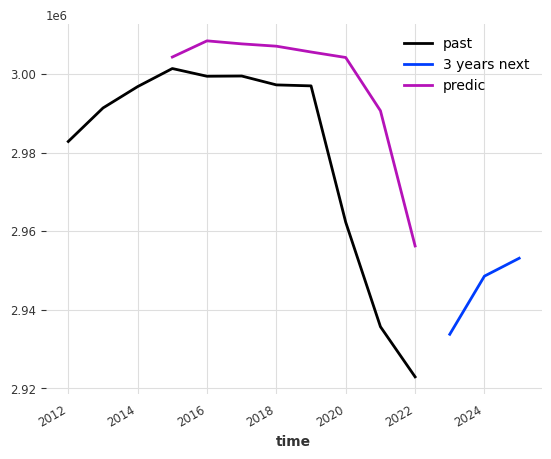

In [ ]:
from darts.models import TBATS

model = TBATS(use_trend=True)
model.fit(sexpopbkk["pop_female"])
history = model.historical_forecasts(sexpopbkk["pop_female"])
pred = model.predict(3)

sexpopbkk["pop_female"].plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopbkk["pop_female"], history)))
print("MSE: {:.2f}".format(mse(sexpopbkk["pop_female"], history)))
print("MAE: {:.2f}".format(mae(sexpopbkk["pop_female"], history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_female
year,
2023-01-01,2933783
2024-01-01,2948567
2025-01-01,2953116


#### FourTheta

MAPE: 0.56%
MSE: 394302897.60
MAE: 14700.18


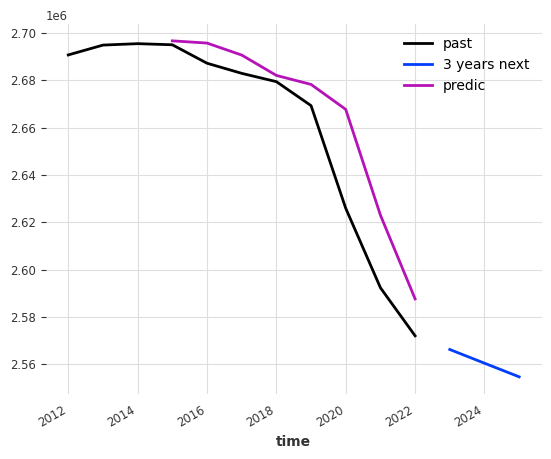

In [ ]:
from darts.models import FourTheta

model = FourTheta(theta=2)
model.fit(sexpopbkk["pop_male"])
history = model.historical_forecasts(sexpopbkk["pop_male"])
pred = model.predict(3)

sexpopbkk["pop_male"].plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopbkk["pop_male"], history)))
print("MSE: {:.2f}".format(mse(sexpopbkk["pop_male"], history)))
print("MAE: {:.2f}".format(mae(sexpopbkk["pop_male"], history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_male
year,
2023-01-01,2566190
2024-01-01,2560406
2025-01-01,2554622


MAPE: 0.36%
MSE: 263965690.61
MAE: 10760.64


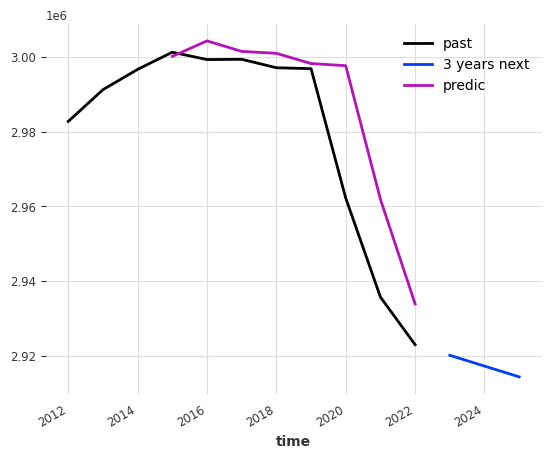

In [ ]:
from darts.models import FourTheta

model = FourTheta(theta=2)
model.fit(sexpopbkk["pop_female"])
history = model.historical_forecasts(sexpopbkk["pop_female"])
pred = model.predict(3)

sexpopbkk["pop_female"].plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopbkk["pop_female"], history)))
print("MSE: {:.2f}".format(mse(sexpopbkk["pop_female"], history)))
print("MAE: {:.2f}".format(mae(sexpopbkk["pop_female"], history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_female
year,
2023-01-01,2920115
2024-01-01,2917224
2025-01-01,2914332


### House

In [ ]:
housebkk = popbkk[["sum_house"]]
housebkk

,sum_house
year,
2022-01-01,3197865
2013-01-01,2593827
2018-01-01,2959524
2021-01-01,3147231
2014-01-01,2672423
2017-01-01,2887274
2012-01-01,2522855
2016-01-01,2816711
2019-01-01,3041115


In [ ]:
housebkk = TimeSeries.from_dataframe(housebkk)
housebkk

<TimeSeries (DataArray) (year: 11, component: 1, sample: 1)>
array([[[2522855.]],

       [[2593827.]],

       [[2672423.]],

       [[2753972.]],

       [[2816711.]],

       [[2887274.]],

       [[2959524.]],

       [[3041115.]],

       [[3103483.]],

       [[3147231.]],

       [[3197865.]]])
Coordinates:
  * year       (year) datetime64[ns] 2012-01-01 2013-01-01 ... 2022-01-01
  * component  (component) object 'sum_house'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='year'>

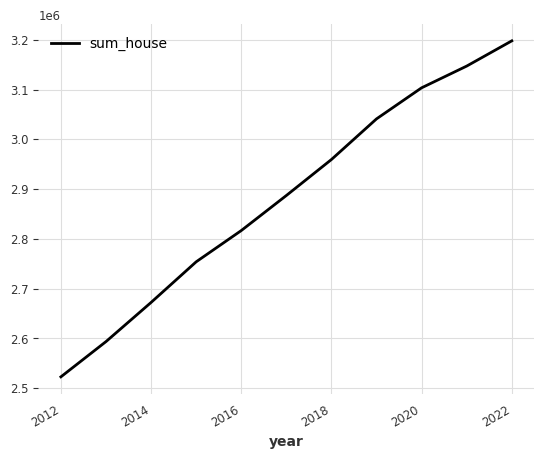

In [ ]:
housebkk.plot()

#### NaiveDrift

MAPE: 0.38%
MSE: 206916828.84
MAE: 11581.67


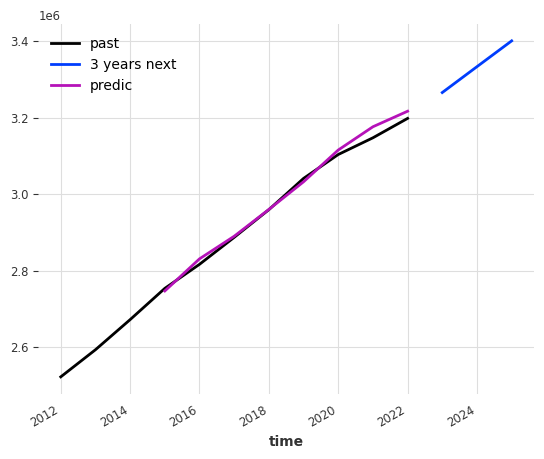

In [ ]:
model = NaiveDrift()
model.fit(housebkk)
history = model.historical_forecasts(housebkk)
pred = model.predict(3)

housebkk.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(housebkk, history)))
print("MSE: {:.2f}".format(mse(housebkk, history)))
print("MAE: {:.2f}".format(mae(housebkk, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,sum_house
year,
2023-01-01,3265366
2024-01-01,3332867
2025-01-01,3400368


#### LinearRegressionModel

MAPE: 0.94%
MSE: 868263119.83
MAE: 29116.90


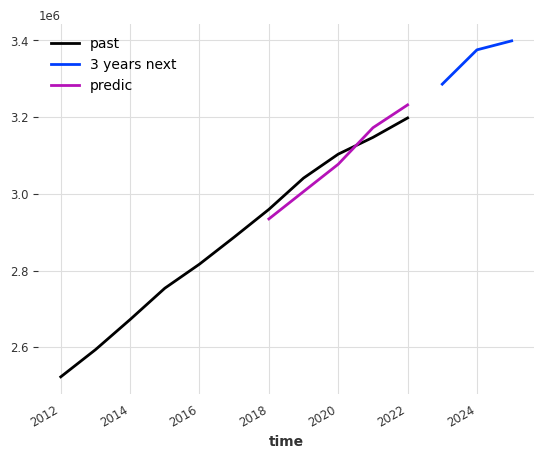

In [ ]:
from darts.models import LinearRegressionModel

model = LinearRegressionModel(lags=3, output_chunk_length=2)
model.fit(housebkk)
history = model.historical_forecasts(housebkk)
pred = model.predict(3)

housebkk.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(housebkk, history)))
print("MSE: {:.2f}".format(mse(housebkk, history)))
print("MAE: {:.2f}".format(mae(housebkk, history)))


In [ ]:
pred.pd_dataframe().astype(int)

component,sum_house
year,
2023-01-01,3285993
2024-01-01,3375430
2025-01-01,3398899


#### TBATS

MAPE: 0.52%
MSE: 402299203.88
MAE: 15811.37


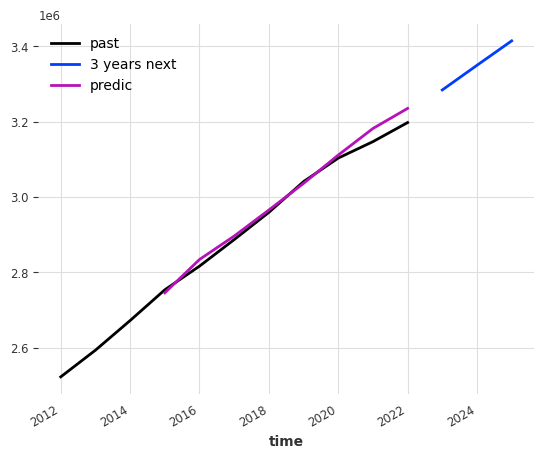

In [ ]:
from darts.models import TBATS

model = TBATS(use_trend=True)
model.fit(housebkk)
history = model.historical_forecasts(housebkk)
pred = model.predict(3)

housebkk.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(housebkk, history)))
print("MSE: {:.2f}".format(mse(housebkk, history)))
print("MAE: {:.2f}".format(mae(housebkk, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,sum_house
year,
2023-01-01,3284404
2024-01-01,3349776
2025-01-01,3414761


#### FourTheta

MAPE: 0.98%
MSE: 984130751.58
MAE: 28779.63


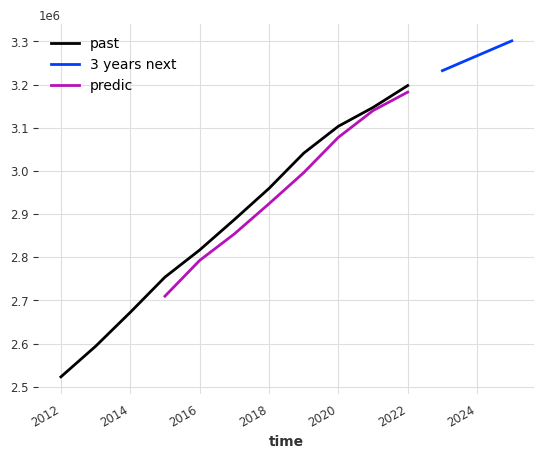

In [ ]:
from darts.models import FourTheta

model = FourTheta(theta=2)
model.fit(housebkk)
history = model.historical_forecasts(housebkk)
pred = model.predict(3)

housebkk.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(housebkk, history)))
print("MSE: {:.2f}".format(mse(housebkk, history)))
print("MAE: {:.2f}".format(mae(housebkk, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,sum_house
year,
2023-01-01,3232405
2024-01-01,3266946
2025-01-01,3301486


## CNX

In [ ]:
popcnx = pop.loc[pop["province"] == "เชียงใหม่"]
popcnx

,population,pop_male,pop_female,area,density,sum_house,increase_rate,year,province,region
682,1789385,864364,925021,20107.05664,88.992882,852520,0.28000,2564,เชียงใหม่,ภาคเหนือ
683,1792474,864339,928135,20107.05664,89.146515,866675,0.17248,2565,เชียงใหม่,ภาคเหนือ
684,1763742,855105,908637,20107.05664,87.717560,802063,0.96000,2561,เชียงใหม่,ภาคเหนือ
685,1779254,861692,917562,20107.05664,88.489029,817820,0.88000,2562,เชียงใหม่,ภาคเหนือ
686,1655642,806720,848922,20107.05664,82.341339,693605,0.58000,2555,เชียงใหม่,ภาคเหนือ
687,1784370,862874,921496,20107.05664,88.743469,835977,0.29000,2563,เชียงใหม่,ภาคเหนือ
688,1728242,840412,887830,20107.05664,85.952011,751765,2.93000,2558,เชียงใหม่,ภาคเหนือ
689,1746840,847521,899319,20107.05664,86.876961,785999,0.64000,2560,เชียงใหม่,ภาคเหนือ
690,1666888,811759,855129,20107.05664,82.900642,713053,0.68000,2556,เชียงใหม่,ภาคเหนือ
691,1735762,843088,892674,20107.05664,86.326012,768855,0.43000,2559,เชียงใหม่,ภาคเหนือ


In [ ]:
popcnx["year"] = popcnx['year'] - 543
popcnx

<ipython-input-52-8ad5a266b288>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popcnx["year"] = popcnx['year'] - 543


,population,pop_male,pop_female,area,density,sum_house,increase_rate,year,province,region
682,1789385,864364,925021,20107.05664,88.992882,852520,0.28000,2021,เชียงใหม่,ภาคเหนือ
683,1792474,864339,928135,20107.05664,89.146515,866675,0.17248,2022,เชียงใหม่,ภาคเหนือ
684,1763742,855105,908637,20107.05664,87.717560,802063,0.96000,2018,เชียงใหม่,ภาคเหนือ
685,1779254,861692,917562,20107.05664,88.489029,817820,0.88000,2019,เชียงใหม่,ภาคเหนือ
686,1655642,806720,848922,20107.05664,82.341339,693605,0.58000,2012,เชียงใหม่,ภาคเหนือ
687,1784370,862874,921496,20107.05664,88.743469,835977,0.29000,2020,เชียงใหม่,ภาคเหนือ
688,1728242,840412,887830,20107.05664,85.952011,751765,2.93000,2015,เชียงใหม่,ภาคเหนือ
689,1746840,847521,899319,20107.05664,86.876961,785999,0.64000,2017,เชียงใหม่,ภาคเหนือ
690,1666888,811759,855129,20107.05664,82.900642,713053,0.68000,2013,เชียงใหม่,ภาคเหนือ
691,1735762,843088,892674,20107.05664,86.326012,768855,0.43000,2016,เชียงใหม่,ภาคเหนือ


In [ ]:
popcnx["year"] = pd.to_datetime(popcnx['year'].astype(str), format='%Y')
popcnx

<ipython-input-53-2e876a2fc816>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popcnx["year"] = pd.to_datetime(popcnx['year'].astype(str), format='%Y')


,population,pop_male,pop_female,area,density,sum_house,increase_rate,year,province,region
682,1789385,864364,925021,20107.05664,88.992882,852520,0.28000,2021-01-01,เชียงใหม่,ภาคเหนือ
683,1792474,864339,928135,20107.05664,89.146515,866675,0.17248,2022-01-01,เชียงใหม่,ภาคเหนือ
684,1763742,855105,908637,20107.05664,87.717560,802063,0.96000,2018-01-01,เชียงใหม่,ภาคเหนือ
685,1779254,861692,917562,20107.05664,88.489029,817820,0.88000,2019-01-01,เชียงใหม่,ภาคเหนือ
686,1655642,806720,848922,20107.05664,82.341339,693605,0.58000,2012-01-01,เชียงใหม่,ภาคเหนือ
687,1784370,862874,921496,20107.05664,88.743469,835977,0.29000,2020-01-01,เชียงใหม่,ภาคเหนือ
688,1728242,840412,887830,20107.05664,85.952011,751765,2.93000,2015-01-01,เชียงใหม่,ภาคเหนือ
689,1746840,847521,899319,20107.05664,86.876961,785999,0.64000,2017-01-01,เชียงใหม่,ภาคเหนือ
690,1666888,811759,855129,20107.05664,82.900642,713053,0.68000,2013-01-01,เชียงใหม่,ภาคเหนือ
691,1735762,843088,892674,20107.05664,86.326012,768855,0.43000,2016-01-01,เชียงใหม่,ภาคเหนือ


In [ ]:
popcnx.set_index(["year"], inplace=True)
popcnx

,population,pop_male,pop_female,area,density,sum_house,increase_rate,province,region
year,,,,,,,,,
2021-01-01,1789385,864364,925021,20107.05664,88.992882,852520,0.28000,เชียงใหม่,ภาคเหนือ
2022-01-01,1792474,864339,928135,20107.05664,89.146515,866675,0.17248,เชียงใหม่,ภาคเหนือ
2018-01-01,1763742,855105,908637,20107.05664,87.717560,802063,0.96000,เชียงใหม่,ภาคเหนือ
2019-01-01,1779254,861692,917562,20107.05664,88.489029,817820,0.88000,เชียงใหม่,ภาคเหนือ
2012-01-01,1655642,806720,848922,20107.05664,82.341339,693605,0.58000,เชียงใหม่,ภาคเหนือ
2020-01-01,1784370,862874,921496,20107.05664,88.743469,835977,0.29000,เชียงใหม่,ภาคเหนือ
2015-01-01,1728242,840412,887830,20107.05664,85.952011,751765,2.93000,เชียงใหม่,ภาคเหนือ
2017-01-01,1746840,847521,899319,20107.05664,86.876961,785999,0.64000,เชียงใหม่,ภาคเหนือ
2013-01-01,1666888,811759,855129,20107.05664,82.900642,713053,0.68000,เชียงใหม่,ภาคเหนือ


### all pop

In [ ]:
allpopcnx = popcnx[["population"]]
allpopcnx

,population
year,
2021-01-01,1789385
2022-01-01,1792474
2018-01-01,1763742
2019-01-01,1779254
2012-01-01,1655642
2020-01-01,1784370
2015-01-01,1728242
2017-01-01,1746840
2013-01-01,1666888


In [ ]:
allpopcnx = TimeSeries.from_dataframe(allpopcnx)
allpopcnx

<TimeSeries (DataArray) (year: 11, component: 1, sample: 1)>
array([[[1655642.]],

       [[1666888.]],

       [[1678284.]],

       [[1728242.]],

       [[1735762.]],

       [[1746840.]],

       [[1763742.]],

       [[1779254.]],

       [[1784370.]],

       [[1789385.]],

       [[1792474.]]])
Coordinates:
  * year       (year) datetime64[ns] 2012-01-01 2013-01-01 ... 2022-01-01
  * component  (component) object 'population'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='year'>

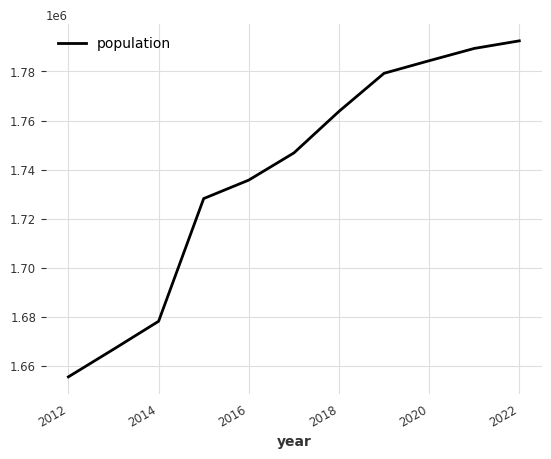

In [ ]:
allpopcnx.plot()

#### NaiveDrift

MAPE: 0.74%
MSE: 284725791.45
MAE: 12937.68


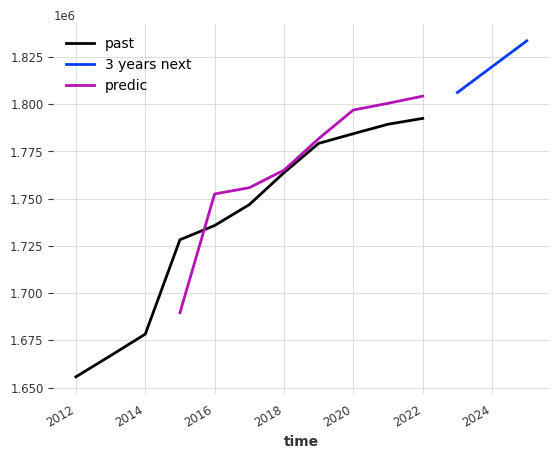

In [ ]:
#testmodel = NaiveDrift()
#testmodel.fit(allpopcnx[:-2])
#testpred = testmodel.predict(2)

model = NaiveDrift()
model.fit(allpopcnx)
history = model.historical_forecasts(allpopcnx)
pred = model.predict(3)

allpopcnx.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(allpopcnx, history)))
print("MSE: {:.2f}".format(mse(allpopcnx, history)))
print("MAE: {:.2f}".format(mae(allpopcnx, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,population
year,
2023-01-01,1806157
2024-01-01,1819840
2025-01-01,1833523


#### LinearRegression

MAPE: 0.70%
MSE: 227288021.30
MAE: 12462.32


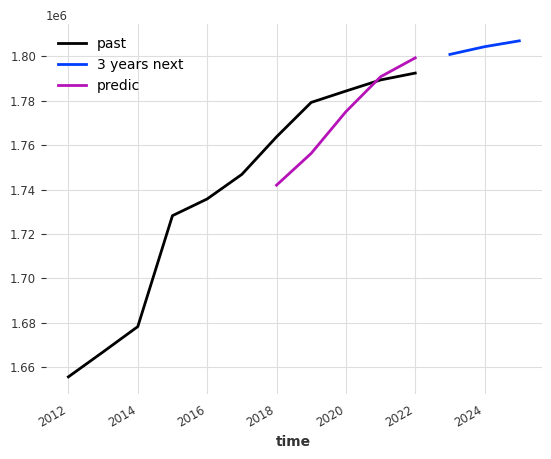

In [ ]:
# testmodel = LinearRegressionModel(lags=3, output_chunk_length=2)
# testmodel.fit(allpopcnx[:-2])
# testpred = testmodel.predict(2)

model = LinearRegressionModel(lags=3, output_chunk_length=2)
model.fit(allpopcnx)
history = model.historical_forecasts(allpopcnx)
pred = model.predict(3)

allpopcnx.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(allpopcnx, history)))
print("MSE: {:.2f}".format(mse(allpopcnx, history)))
print("MAE: {:.2f}".format(mae(allpopcnx, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,population
year,
2023-01-01,1800878
2024-01-01,1804353
2025-01-01,1806989


#### TBATS

MAPE: 1.03%
MSE: 442928764.82
MAE: 18096.41


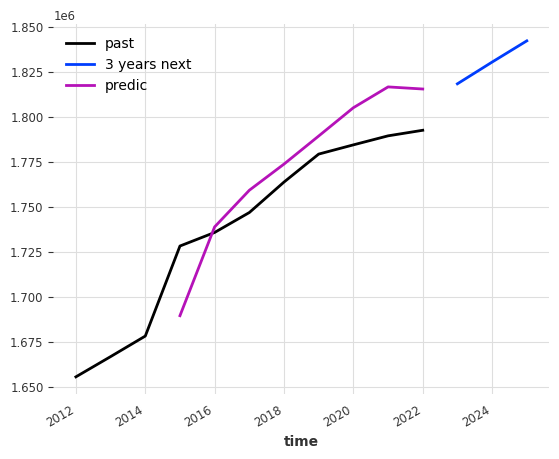

In [ ]:
from darts.models import TBATS

testmodel = TBATS(use_trend=True)
testmodel.fit(allpopcnx[:-3])
testpred = testmodel.predict(2)

model = TBATS(use_trend=True)
model.fit(allpopcnx)
history = model.historical_forecasts(allpopcnx)
pred = model.predict(3)

allpopcnx.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(allpopcnx, history)))
print("MSE: {:.2f}".format(mse(allpopcnx, history)))
print("MAE: {:.2f}".format(mae(allpopcnx, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,population
year,
2023-01-01,1818252
2024-01-01,1830297
2025-01-01,1842094


#### FourTheta

MAPE: 0.74%
MSE: 407808723.46
MAE: 12981.27


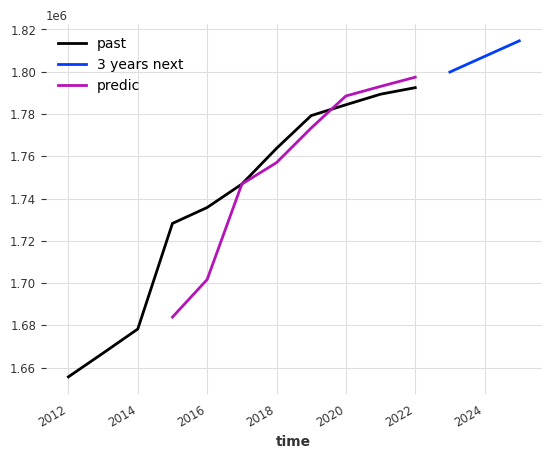

In [ ]:
from darts.models import FourTheta

model = FourTheta(theta=2)
model.fit(allpopcnx)
history = model.historical_forecasts(allpopcnx)
pred = model.predict(3)

allpopcnx.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(allpopcnx, history)))
print("MSE: {:.2f}".format(mse(allpopcnx, history)))
print("MAE: {:.2f}".format(mae(allpopcnx, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,population
year,
2023-01-01,1799870
2024-01-01,1807244
2025-01-01,1814619


### sex pop

In [ ]:
sexpopcnx = popcnx[["pop_male", "pop_female"]]
sexpopcnx

,pop_male,pop_female
year,,
2021-01-01,864364,925021
2022-01-01,864339,928135
2018-01-01,855105,908637
2019-01-01,861692,917562
2012-01-01,806720,848922
2020-01-01,862874,921496
2015-01-01,840412,887830
2017-01-01,847521,899319
2013-01-01,811759,855129


In [ ]:
sexpopcnx = TimeSeries.from_dataframe(sexpopcnx)
sexpopcnx

<TimeSeries (DataArray) (year: 11, component: 2, sample: 1)>
array([[[806720.],
        [848922.]],

       [[811759.],
        [855129.]],

       [[816620.],
        [861664.]],

       [[840412.],
        [887830.]],

       [[843088.],
        [892674.]],

       [[847521.],
        [899319.]],

       [[855105.],
        [908637.]],

       [[861692.],
        [917562.]],

       [[862874.],
        [921496.]],

       [[864364.],
        [925021.]],

       [[864339.],
        [928135.]]])
Coordinates:
  * year       (year) datetime64[ns] 2012-01-01 2013-01-01 ... 2022-01-01
  * component  (component) object 'pop_male' 'pop_female'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='year'>

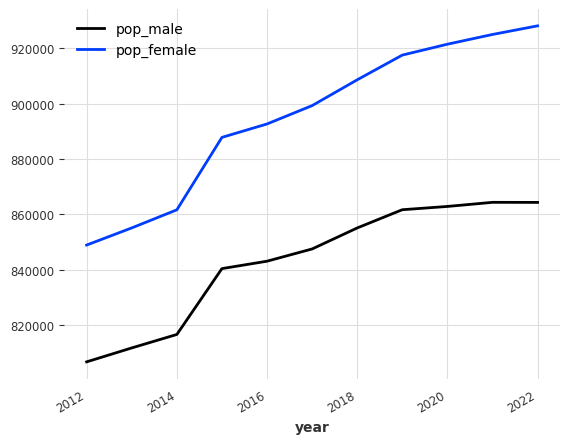

In [ ]:
sexpopcnx.plot()

#### NaiveDrift

MAPE: 0.74%
MSE: 71284169.58
MAE: 6468.84


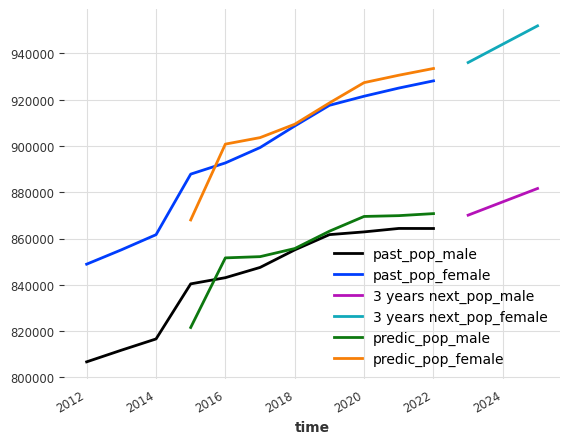

In [ ]:
model = NaiveDrift()
model.fit(sexpopcnx)
history = model.historical_forecasts(sexpopcnx)
pred = model.predict(3)

sexpopcnx.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopcnx, history)))
print("MSE: {:.2f}".format(mse(sexpopcnx, history)))
print("MAE: {:.2f}".format(mae(sexpopcnx, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_male,pop_female
year,,
2023-01-01,870100,936056
2024-01-01,875862,943977
2025-01-01,881624,951898


#### LinearRegression

MAPE: 0.86%
MSE: 76732685.15
MAE: 7700.21


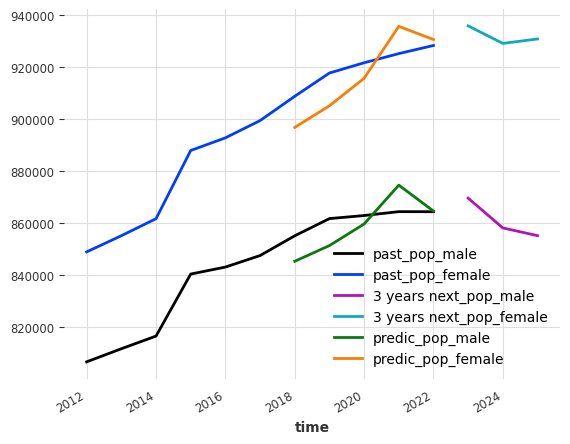

In [ ]:
from darts.models import LinearRegressionModel

# testmodel = LinearRegressionModel(lags=3, output_chunk_length=2)
# testmodel.fit(sexpopcnx[:-2])
# testpred = testmodel.predict(2)

model = LinearRegressionModel(lags=3, output_chunk_length=2)
model.fit(sexpopcnx)
history = model.historical_forecasts(sexpopcnx)
pred = model.predict(3)

sexpopcnx.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopcnx, history)))
print("MSE: {:.2f}".format(mse(sexpopcnx, history)))
print("MAE: {:.2f}".format(mae(sexpopcnx, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_male,pop_female
year,,
2023-01-01,869536,935665
2024-01-01,858121,928936
2025-01-01,855144,930629


#### TBATS

MAPE: 1.09%
MSE: 113538395.20
MAE: 9288.31


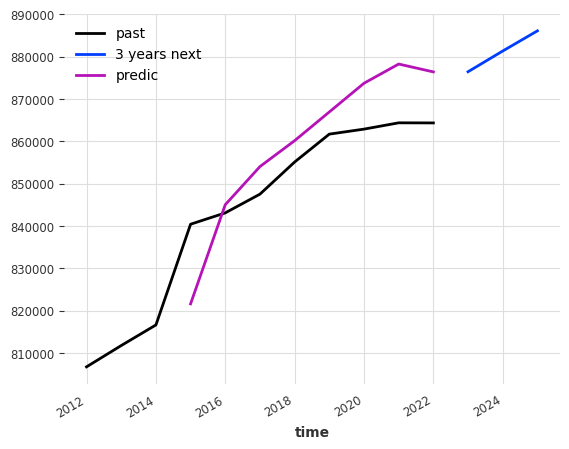

In [ ]:
from darts.models import TBATS

model = TBATS(use_trend=True)
model.fit(sexpopcnx["pop_male"])
history = model.historical_forecasts(sexpopcnx["pop_male"])
pred = model.predict(3)

sexpopcnx["pop_male"].plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopcnx["pop_male"], history)))
print("MSE: {:.2f}".format(mse(sexpopcnx["pop_male"], history)))
print("MAE: {:.2f}".format(mae(sexpopcnx["pop_male"], history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_male
year,
2023-01-01,876426
2024-01-01,881319
2025-01-01,886088


MAPE: 0.97%
MSE: 108326685.74
MAE: 8811.07


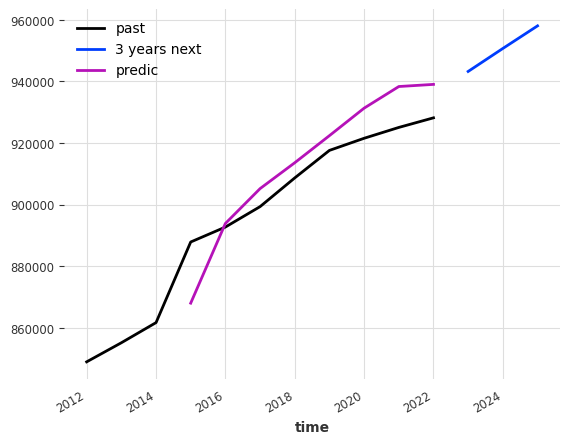

In [ ]:
from darts.models import TBATS

model = TBATS(use_trend=True)
model.fit(sexpopcnx["pop_female"])
history = model.historical_forecasts(sexpopcnx["pop_female"])
pred = model.predict(3)

sexpopcnx["pop_female"].plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopcnx["pop_female"], history)))
print("MSE: {:.2f}".format(mse(sexpopcnx["pop_female"], history)))
print("MAE: {:.2f}".format(mae(sexpopcnx["pop_female"], history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_female
year,
2023-01-01,943189
2024-01-01,950645
2025-01-01,957994


#### FourTheta

MAPE: 0.76%
MSE: 90533575.46
MAE: 6399.18


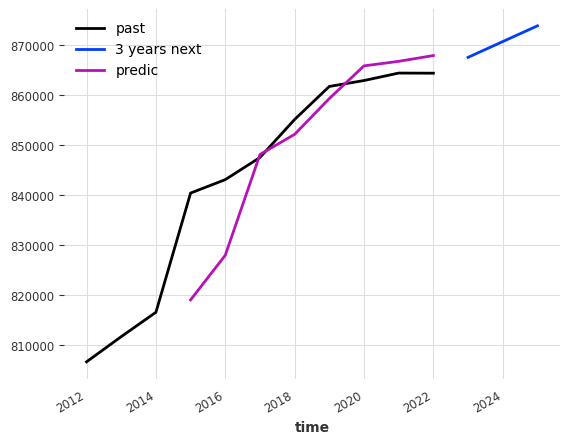

In [ ]:
from darts.models import FourTheta

model = FourTheta(theta=2)
model.fit(sexpopcnx["pop_male"])
history = model.historical_forecasts(sexpopcnx["pop_male"])
pred = model.predict(3)

sexpopcnx["pop_male"].plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopcnx["pop_male"], history)))
print("MSE: {:.2f}".format(mse(sexpopcnx["pop_male"], history)))
print("MAE: {:.2f}".format(mae(sexpopcnx["pop_male"], history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_male
year,
2023-01-01,867499
2024-01-01,870644
2025-01-01,873789


MAPE: 0.50%
MSE: 70384568.03
MAE: 4519.77


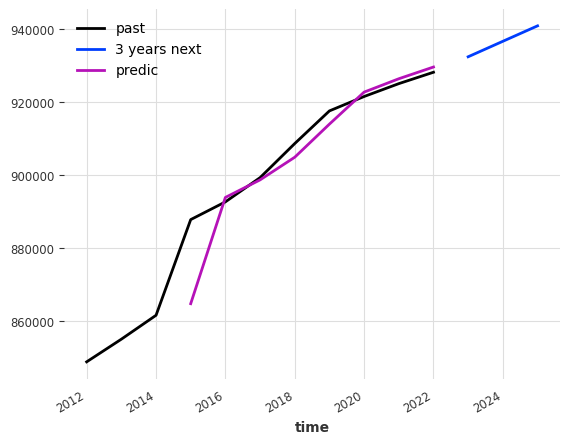

In [ ]:
from darts.models import FourTheta

model = FourTheta(theta=2)
model.fit(sexpopcnx["pop_female"])
history = model.historical_forecasts(sexpopcnx["pop_female"])
pred = model.predict(3)

sexpopcnx["pop_female"].plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(sexpopcnx["pop_female"], history)))
print("MSE: {:.2f}".format(mse(sexpopcnx["pop_female"], history)))
print("MAE: {:.2f}".format(mae(sexpopcnx["pop_female"], history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,pop_female
year,
2023-01-01,932364
2024-01-01,936594
2025-01-01,940824


### House

In [ ]:
housecnx = popcnx[["sum_house"]]
housecnx

,sum_house
year,
2021-01-01,852520
2022-01-01,866675
2018-01-01,802063
2019-01-01,817820
2012-01-01,693605
2020-01-01,835977
2015-01-01,751765
2017-01-01,785999
2013-01-01,713053


In [ ]:
housecnx = TimeSeries.from_dataframe(housecnx)
housecnx

<TimeSeries (DataArray) (year: 11, component: 1, sample: 1)>
array([[[693605.]],

       [[713053.]],

       [[732313.]],

       [[751765.]],

       [[768855.]],

       [[785999.]],

       [[802063.]],

       [[817820.]],

       [[835977.]],

       [[852520.]],

       [[866675.]]])
Coordinates:
  * year       (year) datetime64[ns] 2012-01-01 2013-01-01 ... 2022-01-01
  * component  (component) object 'sum_house'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='year'>

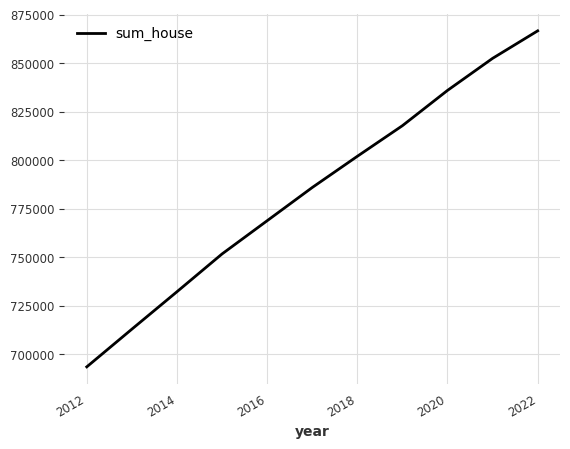

In [ ]:
housecnx.plot()

#### NaiveDrift

MAPE: 0.21%
MSE: 4160663.37
MAE: 1745.63


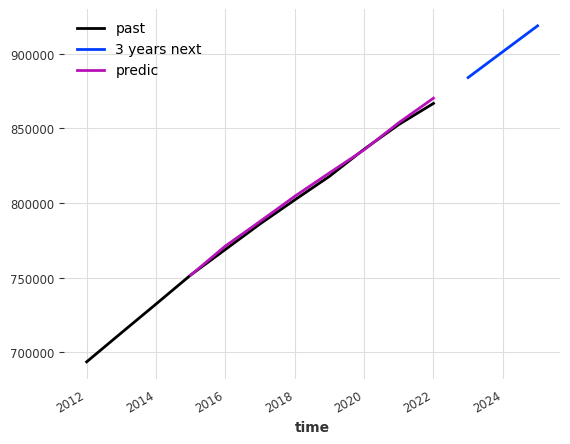

In [ ]:
model = NaiveDrift()
model.fit(housecnx)
history = model.historical_forecasts(housecnx)
pred = model.predict(3)

housecnx.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(housecnx, history)))
print("MSE: {:.2f}".format(mse(housecnx, history)))
print("MAE: {:.2f}".format(mae(housecnx, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,sum_house
year,
2023-01-01,883982
2024-01-01,901289
2025-01-01,918596


#### LinearRegressionModel

MAPE: 0.36%
MSE: 12995787.74
MAE: 3066.50


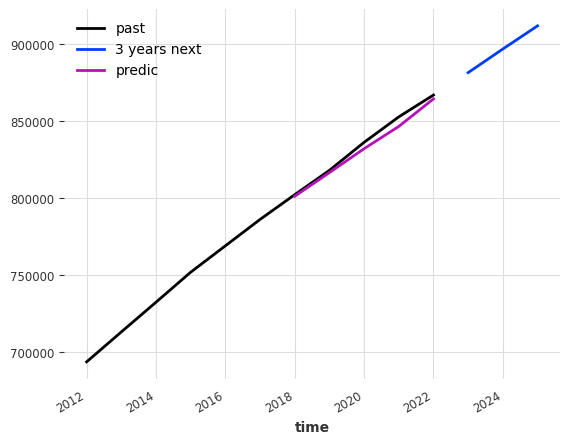

In [ ]:
from darts.models import LinearRegressionModel

model = LinearRegressionModel(lags=3, output_chunk_length=2)
model.fit(housecnx)
history = model.historical_forecasts(housecnx)
pred = model.predict(3)

housecnx.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(housecnx, history)))
print("MSE: {:.2f}".format(mse(housecnx, history)))
print("MAE: {:.2f}".format(mae(housecnx, history)))


In [ ]:
pred.pd_dataframe().astype(int)

component,sum_house
year,
2023-01-01,881179
2024-01-01,896500
2025-01-01,911531


#### TBATS

MAPE: 0.36%
MSE: 11442865.61
MAE: 2934.05


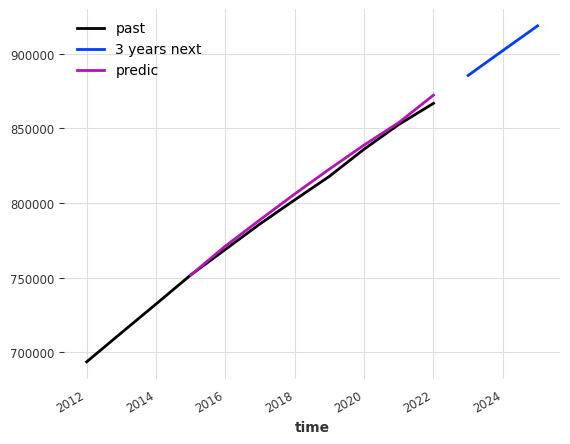

In [ ]:
from darts.models import TBATS

model = TBATS(use_trend=True)
model.fit(housecnx)
history = model.historical_forecasts(housecnx)
pred = model.predict(3)

housecnx.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(housecnx, history)))
print("MSE: {:.2f}".format(mse(housecnx, history)))
print("MAE: {:.2f}".format(mae(housecnx, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,sum_house
year,
2023-01-01,885356
2024-01-01,901986
2025-01-01,918550


#### FourTheta

MAPE: 0.94%
MSE: 59410508.13
MAE: 7594.54


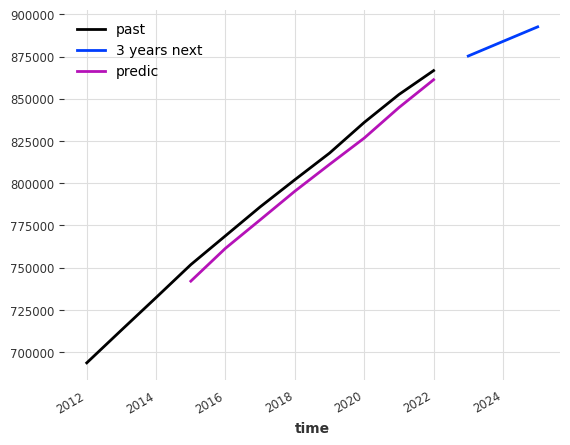

In [ ]:
from darts.models import FourTheta

model = FourTheta(theta=2)
model.fit(housecnx)
history = model.historical_forecasts(housecnx)
pred = model.predict(3)

housecnx.plot(label="past")
pred.plot(label="3 years next")
history.plot(label = "predic")
print("MAPE: {:.2f}%".format(mape(housecnx, history)))
print("MSE: {:.2f}".format(mse(housecnx, history)))
print("MAE: {:.2f}".format(mae(housecnx, history)))

In [ ]:
pred.pd_dataframe().astype(int)

component,sum_house
year,
2023-01-01,875309
2024-01-01,883943
2025-01-01,892577
